<p style = "font-size : 42px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Restaurant_Reviews_Classifier.</strong></p> 

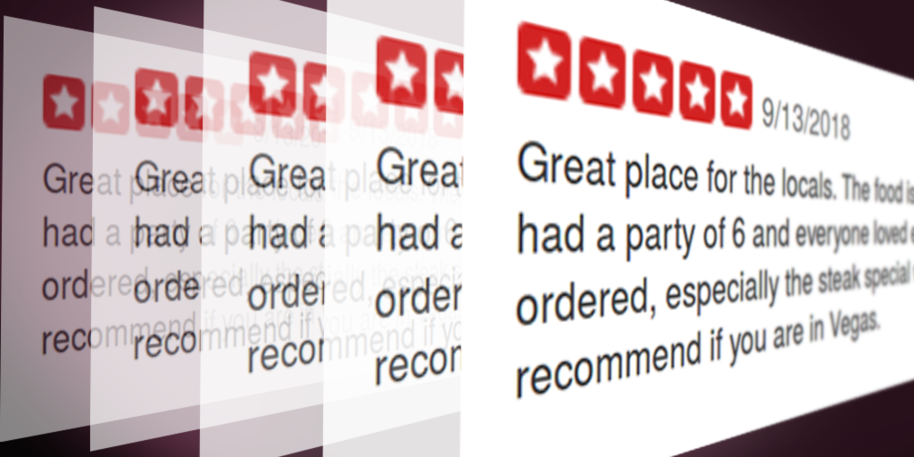

# Part 1: Data preprocessing

## Importing the libraries and dataset .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# quoting=3: we have many double quotes within the text, we have to ignore these double quotes
# it can lead to an execution error

## Data Exploration .

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.shape

(1000, 2)

In [5]:
# check the columns
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Review'], dtype='object')

In [8]:
# columns with numerical values
dataset.select_dtypes(include=['int64']).columns

Index(['Liked'], dtype='object')

In [9]:
# statistical summary
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
dataset['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

## Dealing with missing values .

In [11]:
# check if there are any null values
dataset.isnull().values.any()

False

In [12]:
# check how many null values
dataset.isnull().values.sum()

0

## Countplot . 

Text(0, 0.5, 'Count')

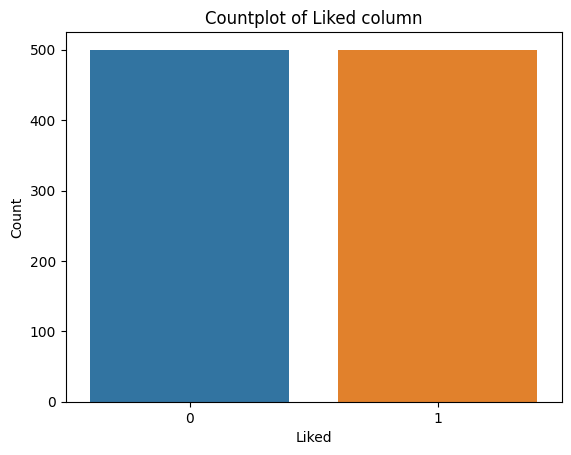

In [13]:
sns.countplot(data = dataset ,x='Liked')
plt.title("Countplot of Liked column")
plt.xlabel("Liked")
plt.ylabel("Count")

In [14]:
#  count of negative (0) , positive (1) reveiw .
(dataset.Liked == 0).sum(),(dataset.Liked == 1).sum()

(500, 500)

## Check length of the messages .

In [15]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [16]:
dataset['length'] = dataset['Review'].apply(len)
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

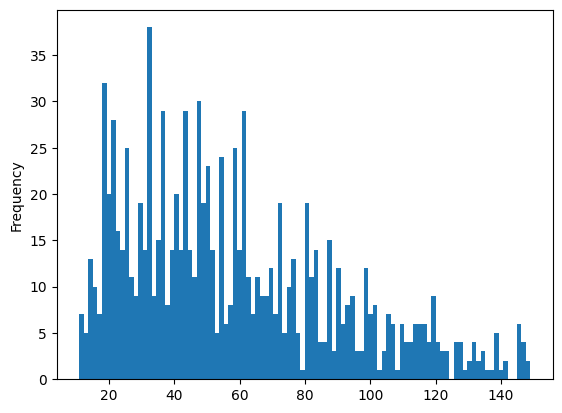

In [17]:
# Frequency Of 'leangth' column through  'histogram' .
dataset['length'].plot(bins=100, kind='hist')

In [18]:
# statistical summary of leangth column.
dataset.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [19]:
# longest message in dataset .
dataset[dataset['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [20]:
# shortest message in dataset .
dataset[dataset['length']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [21]:
positive = dataset[dataset['Liked']==1]
negative = dataset[dataset['Liked']==0]

In [22]:
positive.head()   # all positive review.

,Review,Liked,length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14


In [23]:
negative.head()   # all negative review.

,Review,Liked,length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111


## Cleaning the texts and creating bag of words model .

In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
corpus =[]

for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review=review.lower()
  review=review.split()

  ps=PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set(all_stopwords)]

  review= ' '.join(review)
  corpus.append(review)

## Creating A Bag Of Words Model .

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features=1500)

In [28]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [29]:
x.shape

(1000, 1500)

In [30]:
y.shape

(1000,)

## Splitting The Datasets .

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [32]:
x_train.shape

(800, 1500)

In [33]:
x_test.shape

(200, 1500)

In [34]:
y_train.shape

(800,)

In [35]:
y_test.shape

(200,)

# Part 2 : Model Building 

## 1.Naive Bayes .

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred = classifier_nb.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [39]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186


In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


## 2.XGBoost classifier.

In [41]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [42]:
y_pred = classifier_xgb.predict(x_test)

In [43]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186
1,XGBoost,0.72,0.797468,0.611650,0.692308


In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 16]
 [40 63]]


## 3.Random Forest Classifier .

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = classifier_rf.predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.730,0.684211,0.883495,0.771186
1,XGBoost,0.720,0.797468,0.611650,0.692308
2,Random Forest,0.745,0.882353,0.582524,0.701754


In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89  8]
 [43 60]]


## 4.SVM Classifier .

In [49]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train, y_train)

SVC()

In [50]:
y_pred = classifier_svc.predict(x_test)

In [51]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.730,0.684211,0.883495,0.771186
1,XGBoost,0.720,0.797468,0.611650,0.692308
2,Random Forest,0.745,0.882353,0.582524,0.701754
3,SVM,0.780,0.893333,0.650485,0.752809


In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89  8]
 [36 67]]


# Part 3 : Final Model (SVM Classifier)

In [53]:
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(x_train, y_train)

SVC()

In [54]:
y_pred = classifier.predict(x_test)

In [55]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

78.0


# Part 4 :Making the prediction. (Positive & Negavtive) .

### Positive Review : "Absolutely amazing experience!"

In [56]:
new_review = "Absolutely amazing experience!"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[1]


### Negative Review : "Terrible customer service."

In [57]:
new_review = "Terrible customer service."
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[0]


<p style = "font-size : 22px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Conclusion : Our Restaurant Reviews Classifier effectively categorizes sentiments in customer feedback, aiding restaurants in making data-driven decisions.</strong></p>